In [72]:
import time
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from pandas.plotting import parallel_coordinates
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler # 표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.datasets import load_iris
# cross_val_score: 다양한 샘플링으 ㄹ해서 여러번 테스트 --> 평균치를 구해본다.!
from sklearn.metrics import *
%matplotlib inline

# 주요 라이브러리 import

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm


# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Users/hi/Himedia_jupyter/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
import scipy.io as spio

from pandas.plotting import parallel_coordinates

In [7]:
# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(5)

In [8]:
train = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv")

In [11]:
basketball = pd.read_csv("../csv-data/basketball_stat.csv")
basketball

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [13]:
basketball.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)
basketball

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


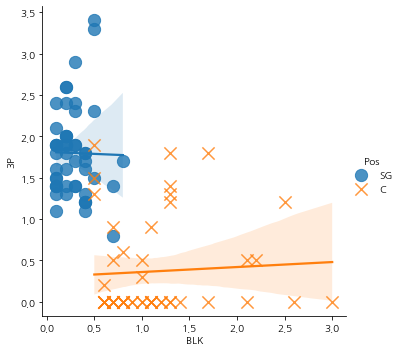

In [15]:
sns.lmplot('BLK', '3P', data=basketball, fit_reg=True, ##x축, y축, 라인
          scatter_kws={"s":150},
          markers=["o","x"],
          hue="Pos")#예측값

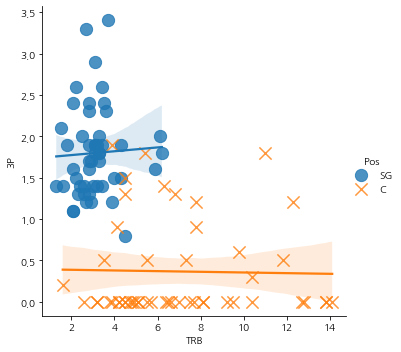

In [16]:
sns.lmplot('TRB', '3P', data=basketball, fit_reg=True, ##x축, y축, 라인
          scatter_kws={"s":150},
          markers=["o","x"],
          hue="Pos")#예측값

In [9]:
train

,Player,Pos,3P,TRB,BLK
0,Denzel Valentine,SG,1.3,2.6,0.1
1,Kyle Korver,SG,2.4,2.8,0.3
2,Troy Daniels,SG,2.1,1.5,0.1
3,Tim Hardaway,SG,1.9,2.8,0.2
4,Dewayne Dedmon,C,0.0,6.5,0.8
...,...,...,...,...,...
75,Victor Oladipo,SG,1.9,4.3,0.3
76,Willie Cauley-Stein,C,0.0,4.5,0.6
77,Brook Lopez,C,1.8,5.4,1.7
78,Josh Richardson,SG,1.4,3.2,0.7


In [10]:
test

,Player,Pos,3P,TRB,BLK
0,JaVale McGee,C,0.0,3.2,0.9
1,Manu Ginobili,SG,1.3,2.3,0.2
2,Nene Hilario,C,0.0,4.2,0.6
3,Evan Fournier,SG,1.9,3.1,0.1
4,Georgios Papagiannis,C,0.0,3.9,0.8
5,Anthony Davis,C,0.5,11.8,2.2
6,Tarik Black,C,0.0,5.1,0.7
7,Jamal Crawford,SG,1.4,1.6,0.2
8,Jordan Clarkson,SG,1.4,3.0,0.1
9,Marcin Gortat,C,0.0,10.4,0.7


In [30]:
basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   TRB     100 non-null    float64
 4   BLK     100 non-null    float64
dtypes: float64(3), object(2)
memory usage: 4.0+ KB


In [47]:
## train, test split
X_train, X_test, y_train, y_test = train_test_split(
    basketball[['3P', 'TRB', 'BLK']],
    basketball['Pos'],
    test_size=0.2,
    random_state=42
)

In [55]:
df = basketball
df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


In [49]:
# plt.figure(figsize=(20, 10))
# parallel_coordinates(basketball, 'Pos') ##dataframe, target
# plt.xlabel('Features', fontsize=15)
# plt.ylabel('Feature values', fontsize=15)
# plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
# plt.show()

In [77]:
## 1111111111모델 선정 => cross-validation

In [78]:
# def print_test_metrics(model, X_test, y_test):
#     print('*** Test data Accuracy ***')
#     pred3 = best_knn.predict(X_test) #모의고사=>작성한 답
#     acc3 = accuracy_score(y_test, pred3) #작성한 답과 실제답안지 비교
#     print('{:2f}'.format(acc3))
#     print('*** Confusion Matrix ***')
#     print(confusion_matrix(y_test, pred3))
#     print('*** Confusion Matrix(precision) ***')
#     print(precision_score(y_test, pred3, average='macro'))
#     print('***classification re(precision) ***')
#     print(classification_report(y_test, pred))

In [63]:
df_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state= 11)
svc_clf = SVC()
clf_list = [df_clf, rf_clf, svc_clf]
data = ['3P', 'TRB', 'BLK']

In [64]:
def exec_kfold(df, clf, k):
    acc_list = []
    kfold = KFold(n_splits=k)
    for i, (train_index, test_index) in enumerate(kfold.split(df[data])):
        X_train2,X_test2 = df[data].values[train_index], df[data].values[test_index]
        y_train2,y_test2 = df['Pos'].values[train_index],df['Pos'].values[test_index]
        
        clf.fit(X_train2, y_train2)
        pred2 = clf.predict(X_test2)
        acc = accuracy_score(y_test2, pred2)
        acc_list.append(acc)
        print(i , ': 교차검증 정확도>> {0:.2f}'.format(acc))
    print('평균 정확도>> {0:.2f}'.format(np.mean(acc_list)))
    return np.mean(acc_list)

In [65]:
acc_total = []
dt5 = []
dt10=[]
rf5 = []
rf10 = []
svc5 = []
svc10 = []

model_list = ['decision tree', 'random forest', 'svm']
for i, clf in enumerate(clf_list):
    for k in [5,10]:
        print(model_list[i], k, '----검증시작----')
        acc_result = exec_kfold(df, clf, k)
        acc_total.append(acc_result)

decision tree 5 ----검증시작----
0 : 교차검증 정확도>> 0.85
1 : 교차검증 정확도>> 0.90
2 : 교차검증 정확도>> 0.95
3 : 교차검증 정확도>> 0.95
4 : 교차검증 정확도>> 0.95
평균 정확도>> 0.92
decision tree 10 ----검증시작----
0 : 교차검증 정확도>> 0.90
1 : 교차검증 정확도>> 1.00
2 : 교차검증 정확도>> 0.90
3 : 교차검증 정확도>> 0.90
4 : 교차검증 정확도>> 1.00
5 : 교차검증 정확도>> 0.90
6 : 교차검증 정확도>> 1.00
7 : 교차검증 정확도>> 0.90
8 : 교차검증 정확도>> 1.00
9 : 교차검증 정확도>> 0.90
평균 정확도>> 0.94
random forest 5 ----검증시작----
0 : 교차검증 정확도>> 0.95
1 : 교차검증 정확도>> 0.90
2 : 교차검증 정확도>> 0.95
3 : 교차검증 정확도>> 1.00
4 : 교차검증 정확도>> 0.95
평균 정확도>> 0.95
random forest 10 ----검증시작----
0 : 교차검증 정확도>> 0.90
1 : 교차검증 정확도>> 1.00
2 : 교차검증 정확도>> 0.90
3 : 교차검증 정확도>> 0.90
4 : 교차검증 정확도>> 1.00
5 : 교차검증 정확도>> 0.90
6 : 교차검증 정확도>> 1.00
7 : 교차검증 정확도>> 1.00
8 : 교차검증 정확도>> 1.00
9 : 교차검증 정확도>> 0.90
평균 정확도>> 0.95
svm 5 ----검증시작----
0 : 교차검증 정확도>> 0.85
1 : 교차검증 정확도>> 0.90
2 : 교차검증 정확도>> 0.95
3 : 교차검증 정확도>> 1.00
4 : 교차검증 정확도>> 0.90
평균 정확도>> 0.92
svm 10 ----검증시작----
0 : 교차검증 정확도>> 0.80
1 : 교차검증 정확도>> 1.00
2 : 교차검증 정확도>> 0.90
3 : 교차검증 정확도>

In [68]:
for i in range(3):
    for k, x in enumerate([5,10]):
        print(model_list[i], x, " 교차검증 평균: ", acc_total[(2*i)+k])

decision tree 5  교차검증 평균:  0.9200000000000002
decision tree 10  교차검증 평균:  0.9400000000000001
random forest 5  교차검증 평균:  0.95
random forest 10  교차검증 평균:  0.95
svm 5  교차검증 평균:  0.9200000000000002
svm 10  교차검증 평균:  0.93


In [69]:
# 최대 평균값 ==
max_value = np.max(acc_total)
# 최대 평균값 인덱스 ==
max_index = np.argmax(acc_total)
# 최대 평균값 모델명 ==
max_model = model_list[max_index//2]

print('최고 교차 검증 평균>> ', max_value)
print('최고 교차 검증 인덱스>> ', max_index)
print('최고 교차 검증 모델링>> ', max_model)

최고 교차 검증 평균>>  0.95
최고 교차 검증 인덱스>>  2
최고 교차 검증 모델링>>  random forest


# Cross-validation(교차검증)

In [142]:
##22222모델 선정 cross-validation(교차검증)
## knn, svm, decision tree

In [225]:
knn = KNeighborsClassifier()
svm = SVC()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
model_list = [rf, svm, dtree, knn]
model_list

[RandomForestClassifier(),
 SVC(),
 DecisionTreeClassifier(),
 KNeighborsClassifier()]

In [226]:
def print_cv(model, train, test, k):
    scores = cross_val_score(model, train, test, cv = k)
    print('----',model_list[i], k, '교차검증시작----')
    print('결과:', scores)
    mean_scores = np.mean(scores)
    print('평균:', mean_scores)
    return scores, mean_scores 

# 함수의 결과로 여러개의 데이터를 return
# 튜플로 묶어서 반환하게 된다.(scores, mean_scores)

In [227]:
model_names = ['RandomForest','SVC','DescisionTree']
k_number=[5, 10]
sc_list = []
mean_sc_list = []
for i, model in enumerate(model_list):
    for k in k_number:
        sc, mean_sc = print_cv(model, X_train, y_train, k)
        sc_list.append(sc)
        mean_sc_list.append(mean_sc)
    print()
print('**********************************************************************************************************************')
print()
print()
print('모델명:', model_names,'k:', k_number)
print()
print()
print('전체 모델의 교차 검증 결과 리스트:')
print(sc_list)
print('전체 모델의 교차 검증 결과 평균:')
print(mean_sc_list)
print()
# 최대 평균값 ==
max_value = np.max(mean_sc_list)
# 최대 평균값 인덱스 ==
max_index = np.argmax(mean_sc_list)
# 최대 평균값 모델명 ==
max_model = model_list[max_index//2]
if max_index%2 ==0:
    k_max = 5
else:
    k_max = 10

print('최고 교차 검증 평균>> ', max_value)
print('최고 교차 검증 인덱스>> ', max_index)
print('최고 교차 검증 모델링>> ', max_model, 'k =', k_max)

---- RandomForestClassifier() 5 교차검증시작----
결과: [0.9375 1.     1.     0.875  1.    ]
평균: 0.9625
---- RandomForestClassifier() 10 교차검증시작----
결과: [1.    0.875 1.    1.    1.    1.    0.875 0.875 1.    1.   ]
평균: 0.9625

---- SVC() 5 교차검증시작----
결과: [0.875  0.875  0.8125 0.9375 1.    ]
평균: 0.9
---- SVC() 10 교차검증시작----
결과: [1.    0.75  0.875 0.875 0.625 1.    1.    0.875 1.    1.   ]
평균: 0.9

---- DecisionTreeClassifier() 5 교차검증시작----
결과: [0.9375 1.     0.875  0.875  1.    ]
평균: 0.9375
---- DecisionTreeClassifier() 10 교차검증시작----
결과: [1.    0.875 1.    1.    0.875 1.    0.875 0.875 1.    1.   ]
평균: 0.95

---- KNeighborsClassifier() 5 교차검증시작----
결과: [0.9375 0.8125 0.8125 0.875  1.    ]
평균: 0.8875
---- KNeighborsClassifier() 10 교차검증시작----
결과: [0.875 0.875 0.875 0.75  0.625 1.    0.875 0.875 1.    1.   ]
평균: 0.875

**********************************************************************************************************************


모델명: ['RandomForest', 'SVC', 'DescisionTree'] k: [5, 10]


전체 

(array([1., 1., 2., 0., 0., 0., 0., 1., 1., 2.]),
 array([0.875  , 0.88375, 0.8925 , 0.90125, 0.91   , 0.91875, 0.9275 ,
        0.93625, 0.945  , 0.95375, 0.9625 ]),
 <BarContainer object of 10 artists>)

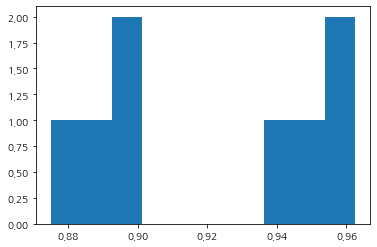

In [228]:
## 시각화해서 비교해보자
plt.hist(mean_sc_list)

In [229]:
## 교차검증 결과 Decision Tree를 사용해서 테스트 해보기로 결정함!!


[**Decision Tree Parameters**]

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

<img src="https://github.com/syshin0116/Himedia_Jupyter/blob/master/data13/DecisionTreeClassifier.PNG?raw=true" height="700" width="700">

In [230]:
## 하이퍼 파라메터 -> grid search

In [231]:
def grid_search(model, params, k):
    gs_model = GridSearchCV(model, params, cv=k)
    ## gs_model는 최적의 파라메터가 적요된 모델의 객체!
    gs_model.fit(X_train, y_train)
    print('best_estimator:',gs_model.best_estimator_) ##최적의 파라메터가 적용된 모델 객체
    print('best_score:',gs_model.best_score_) ##최적의 파라메터가 적용된 모델로 학습한 정확도 결과(acc)
    print('best_params:',gs_model.best_params_) ##최적의 파라메터
    print('gs_model:',gs_model) #grid_search 객체
    

In [232]:
params = { #하이퍼파라메터 설정으로 가질 수 있는 모든 경우의 수=> 4*3*2: 24
    'max_depth':[3, 5, 7, 10], #key:하이퍼파라메터명, values는 list
    'random_state': [1,3,5],
    'criterion': ['gini','entropy'] #혼란스러운 정도(분류의 정도)를 계산하는 기준
}

In [233]:
for clf in model_list:
    try:
        print('----clf model:', clf, '----')
        grid_search(clf, params, 10)
        print()
    except Exception as e:
        print(e)
        print()

----clf model: RandomForestClassifier() ----
best_estimator: RandomForestClassifier(max_depth=3, random_state=1)
best_score: 0.975
best_params: {'criterion': 'gini', 'max_depth': 3, 'random_state': 1}
gs_model: GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'random_state': [1, 3, 5]})

----clf model: SVC() ----
Invalid parameter criterion for estimator SVC(). Check the list of available parameters with `estimator.get_params().keys()`.

----clf model: DecisionTreeClassifier() ----
best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
best_score: 0.975
best_params: {'criterion': 'entropy', 'max_depth': 3, 'random_state': 1}
gs_model: GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
           

In [234]:
# 함수의 모든 파라메터를 보고 싶으면 함수명 쓰고 shift_tab
grid_search(dtree, params, 5) #grid_search의 모든 경우의 수는 24*5

best_estimator: DecisionTreeClassifier(max_depth=3, random_state=1)
best_score: 0.95
best_params: {'criterion': 'gini', 'max_depth': 3, 'random_state': 1}
gs_model: GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'random_state': [1, 3, 5]})


In [235]:
## insight==>
## grid_search를 통해서 찾은 최적의 파라메터는 {'criterion': 'gini', 'max_depth': 3, 'random_state': 1}
## 

In [236]:
grid_search(rf, params, 10)

best_estimator: RandomForestClassifier(max_depth=3, random_state=1)
best_score: 0.975
best_params: {'criterion': 'gini', 'max_depth': 3, 'random_state': 1}
gs_model: GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'random_state': [1, 3, 5]})


In [237]:
grid_search(rf, params, 5)

best_estimator: RandomForestClassifier(max_depth=3, random_state=3)
best_score: 0.975
best_params: {'criterion': 'gini', 'max_depth': 3, 'random_state': 3}
gs_model: GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'random_state': [1, 3, 5]})


In [238]:
## 최적의 하이퍼 파라메터로 모델 객체 생성
## fit()

dt_gs = DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state=1)
dt_gs.fit(X_train, y_train)
rf_gs = RandomForestClassifier(criterion = 'gini', max_depth=3, random_state=3)
rf_gs.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=3)

In [239]:
## 테스트 데이터로 검증해보자!
def test_validation(model, X_test, y_test):
    predict_result = model.predict(X_test)
    acc = accuracy_score(y_test, predict_result)
    print("accuracy:", acc)
    cf = confusion_matrix(y_test, predict_result)
    ##실제(c) --> 예측(c, sg), 실제(sg)==> 예측(sg,c),
    # 이진분류(binary classification)인 경우에는
    # 예측할 수 있는 경우의 수는 4가지!
    # 4가지를 표형태로 정리해주는 것이 confusion matrix!
    # 첫반째 행/열은 c, 두번째 행/열은 sg, abc순으로 행/열이 결정
    print('confusion_matrix:\n', cf)
    ## confusion matrix는 binary classfication 인 경우에는 보기가 괜찮으나, 
    ## multi class classification인 경우에는 보기가 힘들어서
    ## classification_report 를 사용하는게 보기 편하다
    c_report = classification_report(y_test, predict_result)
    print('classification_report:\n', c_report)

In [240]:
test_validation(dt_gs, X_test, y_test)

accuracy: 0.95
confusion_matrix:
 [[10  0]
 [ 1  9]]
classification_report:
               precision    recall  f1-score   support

           C       0.91      1.00      0.95        10
          SG       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [241]:
## c는 10개를 다 맞춤. sg는 9개를 맞추로, 1개를 c로 예측함(틀림)
## 정확도가 95%가 나왔음.
## acc = 10 + 9/10 + 9 + 1
## 정확도 = 실제C: 예측C + 실제SG: 실제SG/
## 실제C:예측C + 실제SG: 실제SG + 실제C:예측SG + 실제SG예측C 

In [242]:
test_validation(rf_gs, X_test, y_test)

accuracy: 0.95
confusion_matrix:
 [[10  0]
 [ 1  9]]
classification_report:
               precision    recall  f1-score   support

           C       0.91      1.00      0.95        10
          SG       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [ ]:
## recall
# 실제 C중에서, 예측한 값들을 보면 실제 C로 100% 정확하게 예측해냈고, SG로 예측한 것은 없다.
# 실제 SG중에서, 예측한 값들을 보면 실제 SG로 예측한 것이 90%이고, C로 예측한 것이 10%이다.

## precision
# 예측한 C중에서 실제 91%가 C였고, SG는 89%이다.
# 예측한 SG중에서 실제 100%가 SG였고, C는 없었다.

In [203]:
## 정확도 체크, acc, recall, precisio, f1-score
## confusion matrix (혼동행렬)